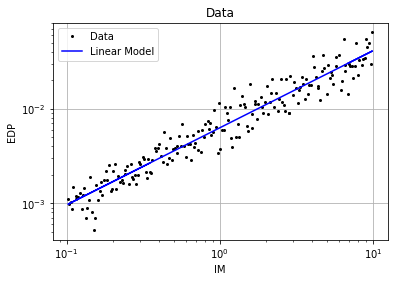

In [3]:
# -*- coding: utf-8 -*-
"""
K. Trevlopoulos
July 2021

This script computes a fragility curves based on linear regression on a cloud
of data, which are found in .csv files.

The script was written using Spyder 4.2.5 and Python 3.8.8 as installed by
Anaconda3-2021.05-Windows-x86_64

"""

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Enther the threshold (h) of the damage state
threshold = 0.02;
# Enter the file names containing the IMs and the EDPs
im = np.genfromtxt('IM.csv', delimiter=',')
edp = np.genfromtxt('EDP.csv', delimiter=',')

# # Draw a random sample from the data
# # Enter the randomization seed. Change it to get a different sample
# rng = np.random.default_rng(12345)
# # Enter the size of the sample
# rints = rng.integers(low=0, high=(len(im)-1), size=50)
# im=im[rints]
# edp=edp[rints]

# Enther the minimum and maximum IM value for the for which the fragilit curve
# will be computed
minIM4fragCurve = 0.1; # enter a value higher than zero
maxIM4fragCurve = 9.9
# Enther the number of points that will be used to discretize the fragility
# curve
noPoints4fragCurve = 99

# A constant step for the IMs is used
imStep = (maxIM4fragCurve-minIM4fragCurve)/(noPoints4fragCurve-1)
# The IMs for which the fragility curve will be computed
ims4fragCurve = np.arange(minIM4fragCurve, maxIM4fragCurve+imStep, imStep);

# Linear regression on a cloud of points
logIM = np.log(im)
logEDP = np.log(edp)
# Adjust a linear model to the data in the log-log space
p = np.polyfit(logIM, logEDP, 1)
# The linear model
logEDPlinModel = p[1].copy() + p[0].copy()* logIM.copy()
# The residuals
epsilon = logEDP.copy() - logEDPlinModel.copy()

# Plot the data and the linear model
fig1, ax1 = plt.subplots()
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax.axis([0,10,0,1.0]) # define the limits of the axes
ax1.grid(True)
ax1.plot(im, edp, linestyle='', color=(0,0,1),
         marker='.', markeredgecolor=(0,0,0), markerfacecolor=(0,0,0),
         markersize='4', label='Data')
ax1.plot(im, np.exp(logEDPlinModel), linestyle='-', color=(0,0,1),
         marker='', markeredgecolor=(0,0,0), markerfacecolor=(0,0,0),
         markersize='4', label='Linear Model')
ax1.set_xlabel('IM')
ax1.set_ylabel('EDP')
ax1.set_title("Data")
ax1.legend()

The lognormal CDF curve, which is used to model the fragility curve, is definded by the follwing equation:

$$
F_X(x) = \Phi( \frac{(lnx) - \mu}{\sigma} )
$$


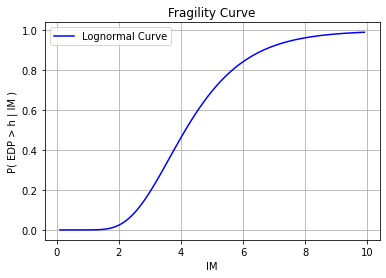

In [6]:
# The median and the dispersion of the fragility curve
median = np.exp( ( np.log(threshold) - p[1].copy() ) / p[0].copy() )
dispersion = np.std( epsilon.copy() ) / p[0].copy()
# The fragility curve
fragCurve = norm.cdf( np.log(ims4fragCurve), np.log(median), dispersion)

# Plot the fragility curve
fig2, ax2 = plt.subplots()
# ax.axis([0,10,0,1.0]) # define the limits of the axes
ax2.grid(True)
ax2.plot(ims4fragCurve, fragCurve, linestyle='-', color=(0,0,1),
         marker='', markeredgecolor=(0,0,0), markerfacecolor=(0,0,0),
         markersize='4', label='Lognormal Curve')
ax2.set_xlabel('IM')
ax2.set_ylabel('P( EDP > h | IM )') # where h is the damage state threshold
ax2.set_title("Fragility Curve")
ax2.legend()